# WE RATE DOGS ANALYSIS
## TABLE OF CONTENTS

[Importing modules](#module)

[Data Gathering](#gathering)

[Data Assessing](#assessing)

[Data Cleaning](#cleaning)

[Data Storing](#storing)

[Data Analysis and Visualization](#analyzing)

In [1]:
#import modules 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import requests 
import matplotlib
import seaborn as sns
plt.style.use("ggplot")
from matplotlib.pyplot import figure
matplotlib.rcParams["figure.figsize"] = (12, 8)
%matplotlib inline


### DATA GATHERING
Data 
In the cell below, gather all three pieces of data for this project and load them in the notebook. Note: the methods required to gather each data are different.

### Import Twitter Enhanced Archive Data

In [2]:
# import the twitter-archive-enhanced data using pandas 
twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv', sep=',')

### Download Image Predictions Data Programmatically

In [3]:
# import the image_predictions.tsv file programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)


In [4]:
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
# load the image-predictions data as csv file 
image_prediction = pd.read_csv('image-predictions.tsv', '\t')

### Get Tweet Data from Twitter API

In [6]:
tweets = pd.read_json("tweet-json.txt", lines=True)

In [7]:
#convert tweets dataframe to csv file
tweets.to_csv('tweets.csv', index=False)

### ASSESSING


In this section, detect and document at least eight (8) quality issues and two (2) tidiness issue. You must use both visual assessment programmatic assessement to assess the data.

Note: pay attention to the following key points when you access the data.

You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used
 

# Twitter Archive Data
We do not need these columns for our analysis -
- in_reply_status_id
- in_reply_to_user_id
- source
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- expanded_urls
# ISSUES 
 - SOme rows are actually Retweets and not original tweets(which is needed for the analysis)
 - This confirms that the rating_denominator and rating_numerator have inconsistent data maybe due to recording data not related, not properly recording the values
 - The Timestamp column is a object data type instead of datetime
 - Timestamp column has extra characters +0000
 - Text column has links attached to it 
 - Dog stages are not in the same column 
 

In [8]:
#check the first few rows 
twitter_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


This shows that the rating_denominator column has different values greater than 10

In [9]:
# CHECK THE DATA TYPES
twitter_enhanced.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [10]:
twitter_enhanced['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

In [11]:
#check the values of the rating_numerator columns
twitter_enhanced['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

This confirms that the rating_denominator and rating_numerator have inconsistent data maybe due to recording data not related, not properly recording the values

In [12]:
#check to confirm the issue with the rating_denominator
greater_than_ten = twitter_enhanced.query('rating_denominator > 10')

pd.set_option("display.max_colwidth", -1)
greater_than_ten[['tweet_id','text','rating_numerator', 'rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80


In [13]:
#check the timestamp column
twitter_enhanced['timestamp']

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [14]:
twitter_enhanced['text']

0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                         
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV    
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                     
3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                               
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f    
5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tu

# Image Predictions
- tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
- p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
- p1_conf is how confident the algorithm is in its #1 prediction → 95%
- p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
- p2 is the algorithm's second most likely prediction → Labrador retriever
- p2_conf is how confident the algorithm is in its #2 prediction → 1%
- p2_dog is whether or not the #2 prediction is a breed of dog → TRUE
etc.


# ISSUES
- The p1_dog column has false values that indicate that some rows are not a breed of dog
- We only need these columns for the analysis = tweet_id, img_num, breed, confidence_level, p1_dog

In [15]:
#check the first few rows of image-predictions data 
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
print(type(image_prediction))

<class 'pandas.core.frame.DataFrame'>


In [17]:
#know about the image predictions table 
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


# Tweets Data
We only need these columns for this analysis -
- id 
- retweet_count
- favorite_count 

# ISSUES 
- The tweet_id column name appears to be id in this table 

In [18]:
#checck the first feww rows of tweets data
tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",39467,False,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'id': 4196983835, 'id_str': '4196983835', 'name': 'WeRateDogs™ (author)', 'screen_name': 'dog_rates', 'location': 'DM YOUR DOGS, WE WILL RATE', 'description': '#1 Source for Professional Dog Ratings | STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs MOBILE APP: @GoodDogsGame | Business: dogratingtwitter@gmail.com', 'url': 'https://t.co/N7sNNHAEXS', 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS', 'expanded_url': 'http://weratedogs.com', 'display_url': 'weratedogs.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 3200889, 'friends_count': 104, 'listed_count': 2784, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'favourites_count': 114031, 'utc_offset': None, 'time_zone': None, 'geo_enabled': True, 'verified': True, 'statuses_count': 5288, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_image_url': 'http://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/861415328504569856/R2xOOfwe_normal.jpg', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1501129017', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'has_extended_profile': True, 'default_profile': False, 'default_profile_image': False, 'following': True, 'follow_request_sent': False, 'notifications': False, 'translator_type': 'none'}"
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmo

In [19]:
#information on the tweets data
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

# DATA CLEANING 

In this section, clean all of the issues you documented while assessing.

Note: Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of tidy data. The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [20]:
# make a copy of the twitter_enhanced data
twitter_enhanced_clean = twitter_enhanced.copy()

In [21]:
# make a copy of the image_predictions table
image_prediction_clean = image_prediction.copy()

In [22]:
# make a copy of the tweets data before cleaning 
tweets_clean = tweets.copy()

In [23]:
print(type(image_prediction_clean))

<class 'pandas.core.frame.DataFrame'>


## QUALITY ISSUES  
 ### 1.  Define - Rows that are retweets and not the original post in the twitter_archive data

### Code

In [24]:
# Drop all rows having NON-missing values 
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean['retweeted_status_id'].isnull()]

### Test 

In [25]:
twitter_enhanced_clean['retweeted_status_id'].unique()

array([ nan])

## 2 : The p1_dog column has false values that indicate that some rows are not a breed of dog
### Define - Remove every Rows containing False value

### Code

In [26]:
# remove rows that has False values present in it
image_prediction_clean = image_prediction_clean[image_prediction_clean['p1_dog'] == True]

In [27]:
# rename the p1 and p1_conf columns to make it more descriptive 
image_prediction_clean.rename(columns = {'p1': 'breed', 'p1_conf': 'confidence_level'}, inplace = True)

### Test

In [28]:
image_prediction_clean['p1_dog'].unique()

array([ True], dtype=bool)

# 3. Some rating_denominator and rating_numerator have inconsistent data maybe due to recording data not related, not properly recording the values 
### Define - 
- Correct the wrongly recorded scores
- Round up the rows not rounded properly to have a denominator of 10
- Delete rows that not having records of dogs ratings.


### Code

In [29]:
# round up values not rounded properly

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 820690176645140481, 'rating_numerator'] = 12
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 820690176645140481, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 758467244762497024, 'rating_numerator'] = 11
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 758467244762497024, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 731156023742988288, 'rating_numerator'] = 12
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 731156023742988288, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 713900603437621249, 'rating_numerator'] = 11
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 713900603437621249, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 710658690886586372, 'rating_numerator'] = 10
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 710658690886586372, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 709198395643068416, 'rating_numerator'] = 9
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 709198395643068416, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 704054845121142784, 'rating_numerator'] = 12
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 704054845121142784, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 697463031882764288, 'rating_numerator'] = 11
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 697463031882764288, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 684225744407494656, 'rating_numerator'] = 11
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 684225744407494656, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 684222868335505415, 'rating_numerator'] = 11
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 684222868335505415, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 677716515794329600, 'rating_numerator'] = 12
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 677716515794329600, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 675853064436391936, 'rating_numerator'] = 11
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 675853064436391936, 'rating_denominator'] = 10

In [30]:
# clean wrongly recorded values 
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 835246439529840640, 'rating_numerator'] = 13
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 835246439529840640, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 775096608509886464, 'rating_numerator'] = 14
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 775096608509886464, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 722974582966214656, 'rating_numerator'] = 13
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 722974582966214656, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 716439118184652801, 'rating_numerator'] = 11
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 716439118184652801, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 682962037429899265, 'rating_numerator'] = 10
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 682962037429899265, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 666287406224695296, 'rating_numerator'] = 9
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 666287406224695296, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 740373189193256964, 'rating_numerator'] = 14
twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 740373189193256964, 'rating_denominator'] = 10

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 786709082849828864, 'rating_numerator'] = 9.75

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 778027034220126208, 'rating_numerator'] = 11.27

twitter_enhanced_clean.loc[twitter_enhanced_clean['tweet_id'] == 680494726643068929, 'rating_numerator'] = 11.26

In [31]:
# Delete rows that not having records of dogs ratings
twitter_enhanced_clean.drop(twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] == 810984652412424192].index, inplace = True)
twitter_enhanced_clean.drop(twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] == 775096608509886464].index, inplace = True)
twitter_enhanced_clean.drop(twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] == 682808988178739200].index, inplace = True)
twitter_enhanced_clean.drop(twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] == 686035780142297088].index, inplace = True)
twitter_enhanced_clean.drop(twitter_enhanced_clean[twitter_enhanced_clean['tweet_id'] == 832088576586297345].index, inplace = True)

### Test 

In [32]:
twitter_enhanced_clean.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


# 3.  We do not need columns for our analysis 
### Define - Drop these columns -
- in_reply_status_id
- in_reply_to_user_id
- source
- retweeted_status_id
- retweeted_status_user_id
- retweeted_status_timestamp
- expanded_url

### Code

In [33]:
twitter_enhanced_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'], axis=1)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13.0,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13.0,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,13.0,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,13.0,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,14.0,10,Cassie,doggo,None,None,None


# 5.   We only need id, favorite_count and retweet_count columns in the tweets data
### Define - Drop all columns except the id, favorite_count and retweet_count

### Code

In [34]:
tweets_clean.drop(tweets_clean.columns.difference(['id', 'favorite_count', 'retweet_count']),axis = 1, inplace = True)

# Test

In [35]:
tweets_clean.head()

,favorite_count,id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


# 6. I only need these columns = tweet_id, img_num, breed, confidence_level, p1_dog in the image prediction data

### Define : Drop every column except [ tweet_id, img_num, breed, confidence_level, p1_dog ]

### Code

In [36]:
image_prediction_clean = image_prediction_clean.drop(image_prediction_clean.columns.difference(['tweet_id', 'img_num', 'breed', 'confidence_level', 'p1_dog']),axis = 1)

# Test 

In [37]:
image_prediction_clean

,tweet_id,img_num,breed,confidence_level,p1_dog
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,1,redbone,0.506826,True
2,666033412701032449,1,German_shepherd,0.596461,True
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,1,miniature_pinscher,0.560311,True
5,666050758794694657,1,Bernese_mountain_dog,0.651137,True
7,666055525042405380,1,chow,0.692517,True
9,666058600524156928,1,miniature_poodle,0.201493,True
10,666063827256086533,1,golden_retriever,0.775930,True
11,666071193221509120,1,Gordon_setter,0.503672,True


# 7. Extra characters in the timestamp column in the twitter_enhanced_clean data

### Define : Strip the extra '0000' from the timestamp column 
### Code

In [38]:
twitter_enhanced_clean['timestamp'] = twitter_enhanced_clean['timestamp'].str.replace(r'\+0000', '', regex=True)

# Test

In [39]:
twitter_enhanced_clean['timestamp'].head

<bound method NDFrame.head of 0       2017-08-01 16:23:56 
1       2017-08-01 00:17:27 
2       2017-07-31 00:18:03 
3       2017-07-30 15:58:51 
4       2017-07-29 16:00:24 
5       2017-07-29 00:08:17 
6       2017-07-28 16:27:12 
7       2017-07-28 00:22:40 
8       2017-07-27 16:25:51 
9       2017-07-26 15:59:51 
10      2017-07-26 00:31:25 
11      2017-07-25 16:11:53 
12      2017-07-25 01:55:32 
13      2017-07-25 00:10:02 
14      2017-07-24 17:02:04 
15      2017-07-24 00:19:32 
16      2017-07-23 00:22:39 
17      2017-07-22 16:56:37 
18      2017-07-22 00:23:06 
20      2017-07-20 16:49:33 
21      2017-07-19 16:06:48 
22      2017-07-19 03:39:09 
23      2017-07-19 00:47:34 
24      2017-07-18 16:08:03 
25      2017-07-18 00:07:08 
26      2017-07-17 16:17:36 
27      2017-07-16 23:58:41 
28      2017-07-16 20:14:00 
29      2017-07-15 23:25:31 
30      2017-07-15 16:51:35 
                ...         
2326    2015-11-17 00:24:19 
2327    2015-11-17 00:06:54 
2328    2015-

# 8. The data type of the timestamp column in the twitter_enhanced_clean table
### Define : Convert the datatype of timestamp column to datetime

### Code

In [40]:
twitter_enhanced_clean["timestamp"] = pd.to_datetime(twitter_enhanced_clean["timestamp"])

### Test

In [41]:
twitter_enhanced_clean['timestamp'].dtypes

dtype('<M8[ns]')

# 9. The tweet_id appears to be id in the tweets_clean data

### Define : Rename the column 'id' to be 'tweet_id'

### Code

In [42]:
tweets_clean.rename(columns={'id': 'tweet_id'} , inplace = True)

### Test

In [43]:
tweets_clean.head()

,favorite_count,tweet_id,retweet_count
0,39467,892420643555336193,8853
1,33819,892177421306343426,6514
2,25461,891815181378084864,4328
3,42908,891689557279858688,8964
4,41048,891327558926688256,9774


### Test 

In [44]:
twitter_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,None,None,None,None


# TIDINESS ISSUES 

# 10. The doggo, puppo, pupper and floofer columns should be in a single column
### Define : Merge the three columns into one column 
### Code

In [45]:
twitter_enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']]= twitter_enhanced_clean[['doggo', 'floofer', 'pupper', 'puppo']].replace('None' , '')
twitter_enhanced_clean['dog_stage'] = twitter_enhanced_clean['doggo'] + twitter_enhanced_clean['floofer'] + twitter_enhanced_clean['pupper'] + twitter_enhanced_clean['puppo']

In [46]:
# Replace every white space with a missing value
twitter_enhanced_clean['dog_stage'] = twitter_enhanced_clean['dog_stage'].replace('', np.nan)

In [47]:
# Now drop the 'doggo', 'puppo', 'pupper', 'floofer' columns 
dogs = ['doggo', 'puppo', 'pupper', 'floofer']
twitter_enhanced_clean.drop(dogs , axis=1, inplace=True)

In [48]:
twitter_enhanced_clean.loc[twitter_enhanced_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'

In [49]:
twitter_enhanced_clean.loc[twitter_enhanced_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'


In [50]:
twitter_enhanced_clean.loc[twitter_enhanced_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'


In [51]:
twitter_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN


In [52]:
twitter_enhanced_clean.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo, puppo',
       'doggo, floofer', 'doggo, pupper'], dtype=object)

### Test 

In [53]:
# confirm 
twitter_enhanced_clean.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10,None,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10,a,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10,a,NaN
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10,a,NaN
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8.0,10,None,NaN


# 11. The three tables should be in a single table 
### Define : Merge the three tables into one table
### Code 

In [54]:
print(type(twitter_enhanced_clean))

<class 'pandas.core.frame.DataFrame'>


In [55]:
print(type(image_prediction_clean))

<class 'pandas.core.frame.DataFrame'>


In [56]:
# merge image_prediction_clean to twitter_enhanced_clean beacuse they have tweet_id in commom 
data = twitter_enhanced_clean.merge(image_prediction_clean ,on='tweet_id' ,  how= 'inner')

In [57]:
# merge the tweets_clean to the data 
final_data = data.merge(tweets_clean, on='tweet_id', how='inner') 

### Test 

In [58]:
final_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,img_num,breed,confidence_level,p1_dog,favorite_count,retweet_count
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,Tilly,NaN,1,Chihuahua,0.323581,True,33819,6514
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,Archie,NaN,1,Chihuahua,0.716012,True,25461,4328
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,Franklin,NaN,2,basset,0.555712,True,41048,9774
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,None,NaN,1,Chesapeake_Bay_retriever,0.425595,True,20562,3261
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,Jax,NaN,1,Appenzeller,0.341703,True,12041,2158


# STORING DATA

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
# save the merged data into a csv file 
final_data.to_csv('twitter_archive_master.csv', index = False)

# ANALYZING & VISUALIZING DATA 

In this section, analyze and visualize your wrangled data. You must produce at least three (3) insights and one (1) visualization.

### Insights:
- What are the most common dog stages? 
- Which is the most common breed?
- Which dog stage has the highest rating?

# Visualization 

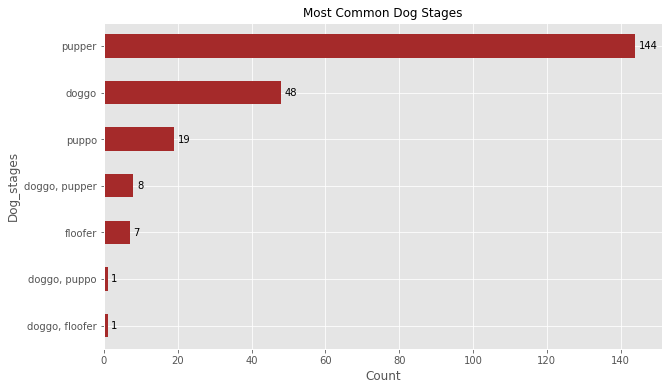

In [60]:
# Plot most common 10 breeds:
plt.figure(figsize=(10,6))
final_data['dog_stage'].value_counts()[0:10].sort_values(ascending=True).plot(kind='barh' , color ='brown')

# Set x_label, y_label and title:
plt.xlabel('Count',size=12)
plt.ylabel('Dog_stages', size=12)
plt.title('Most Common Dog Stages' , size=12)

# Set x & y positions to add text over each bar:
x = final_data['dog_stage'].value_counts()[0:10].sort_values(ascending=True).values
y= np.arange(0,10,1)

# Add text (showing value) over each bar:
for xx, yy in zip(x,y):
    plt.text(xx+1,yy,xx , va='center')

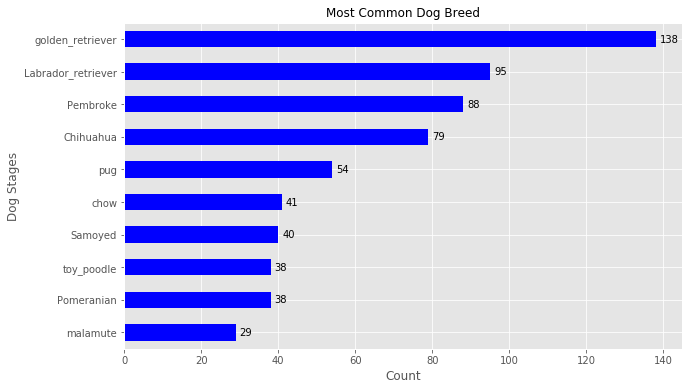

In [61]:
# Create a plot of the most common dog stage
plt.figure(figsize=(10,6))
final_data['breed'].value_counts()[0:10].sort_values(ascending=True).plot(kind='barh' , color ='blue')

# Set x_label, y_label and title:
plt.xlabel('Count',size=12)
plt.ylabel('Dog Stages', size=12)
plt.title('Most Common Dog Breed' , size=12)

# Set x & y positions to add text over each bar:
x = final_data['breed'].value_counts()[0:10].sort_values(ascending=True).values
y= np.arange(0,10,1)

# Add text (showing value) over each bar:
for xx, yy in zip(x,y):
    plt.text(xx+1,yy,xx , va='center')


In [62]:
# get the top breeeds with the highest rating

high_stages = final_data.pivot_table(values = "rating_numerator", index = "dog_stage", aggfunc = "mean")

high_stages.sort_values("rating_numerator", ascending = False, inplace = True)

In [63]:
high_stages = high_stages.reset_index().head(5)

high_stages = high_stages.sort_values("rating_numerator", ascending = True)

In [64]:
high_stages

,dog_stage,rating_numerator
4,"doggo, pupper",11.125000
2,floofer,12.000000
3,puppo,12.000000
1,doggo,12.020833
0,"doggo, puppo",13.000000
